<a href="https://colab.research.google.com/github/ShuaibSiddiqui786/Data-Science/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

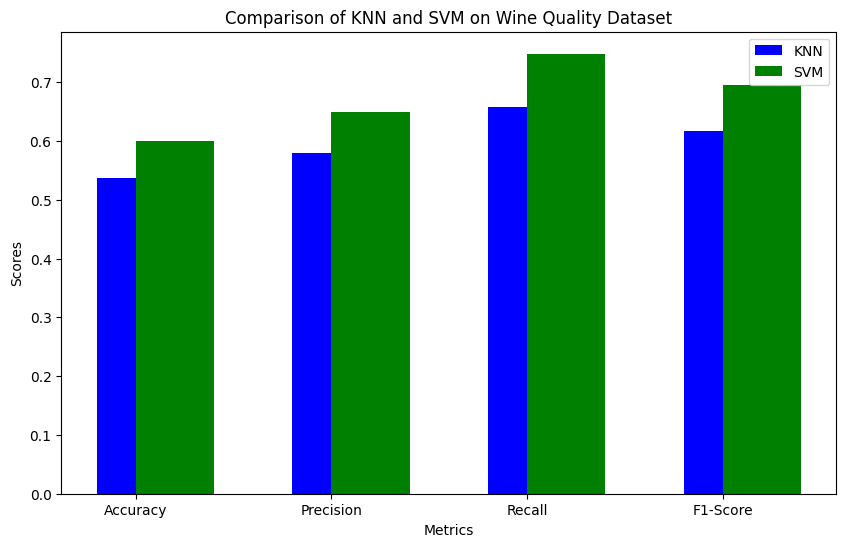

KNN Accuracy: 0.5364431486880467
SVM Accuracy: 0.6005830903790087


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sample_data/WineQT.csv')


print(df.head())


X = df.drop('quality', axis=1)
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)


svm = SVC(kernel='linear')


svm.fit(X_train_scaled, y_train)


y_pred_svm = svm.predict(X_test_scaled)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)


precision_knn = report_knn['5']['precision']
recall_knn = report_knn['5']['recall']
f1_knn = report_knn['5']['f1-score']

precision_svm = report_svm['5']['precision']
recall_svm = report_svm['5']['recall']
f1_svm = report_svm['5']['f1-score']


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn]
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, knn_metrics, width=0.4, label='KNN', align='center', color='blue')
plt.bar(x, svm_metrics, width=0.4, label='SVM', align='edge', color='green')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of KNN and SVM on Wine Quality Dataset')
plt.xticks(x, metrics)
plt.legend()


plt.show()


print(f"KNN Accuracy: {accuracy_knn}")
print(f"SVM Accuracy: {accuracy_svm}")